# Dogecoin Price Prediction with Machine Learning

In [1]:
"""
Dogecoin is a cryptocurrency, like Ethereum or Bitcoin — despite the fact that it's totally different than both of these famous coins. Dogecoin was initially made to some extent as a joke for crypto devotees and took its name from a previously well-known meme.

In this project, we will be implementing a machine learning model which can predict the pattern or forecast the price of the coin in the upcoming days. Let us now move toward the implementation of price prediction.

Importing Libraries and Dataset
Python libraries make it easy for us to handle the data and perform typical and complex tasks with a single line of code.

Pandas: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
Numpy: Numpy arrays are very fast and can perform large computations in a very short time.
Matplotlib/Seaborn : This library is used to draw visualizations.
"""


"\nDogecoin is a cryptocurrency, like Ethereum or Bitcoin — despite the fact that it's totally different than both of these famous coins. Dogecoin was initially made to some extent as a joke for crypto devotees and took its name from a previously well-known meme.\n\nIn this project, we will be implementing a machine learning model which can predict the pattern or forecast the price of the coin in the upcoming days. Let us now move toward the implementation of price prediction.\n\nImporting Libraries and Dataset\nPython libraries make it easy for us to handle the data and perform typical and complex tasks with a single line of code.\n\nPandas: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.\nNumpy: Numpy arrays are very fast and can perform large computations in a very short time.\nMatplotlib/Seaborn : This library is used to draw visualizations.\n"

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor 


In [5]:
# Now let us load the dataset in the panda’s data frame.
data = pd.read_csv("DOGE-USD.csv", sep=',') 
data.head() 


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
1,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
3,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
4,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340


In [22]:
print(data.dtypes)


Close     float64
Volume      int64
gap       float64
a         float64
b         float64
dtype: object


In [24]:
# Now, let's check the correlation
print (data.corr())



           Close    Volume       gap         a         b
Close   1.000000  0.580478  0.366322  0.162905  0.448402
Volume  0.580478  1.000000  0.865801  0.510382  0.953644
gap     0.366322  0.865801  1.000000  0.409841  0.907431
a       0.162905  0.510382  0.409841  1.000000  0.604607
b       0.448402  0.953644  0.907431  0.604607  1.000000


In [8]:
# Converting the string date & time in proper date & time format with the help of pandas. After that check is there any null value is present or not.
data["Date"] = pd.to_datetime(data["Date"], 
                              infer_datetime_format=True) 
data.set_index("Date", inplace=True) 

data.isnull().any()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16900\372385379.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Date"] = pd.to_datetime(data["Date"],


Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
# Now, let’s check for the presence of null values in the dataset.
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Dropping those missing values so that we do not have any errors while analyzing.
data = data.dropna()


In [11]:
# Now, check the statistical analysis of the data using describe() method.
data.describe() 


,Open,High,Low,Close,Adj Close,Volume
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2.409000e+03
mean,0.067902,0.071319,0.064614,0.067966,0.067966,9.731624e+08
std,0.089479,0.096182,0.082975,0.089530,0.089530,3.106343e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002757,0.002827,0.002660,0.002756,0.002756,4.353666e+07
50%,0.053678,0.056980,0.050572,0.053725,0.053725,2.054661e+08
75%,0.087124,0.090797,0.084292,0.087323,0.087323,7.595930e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

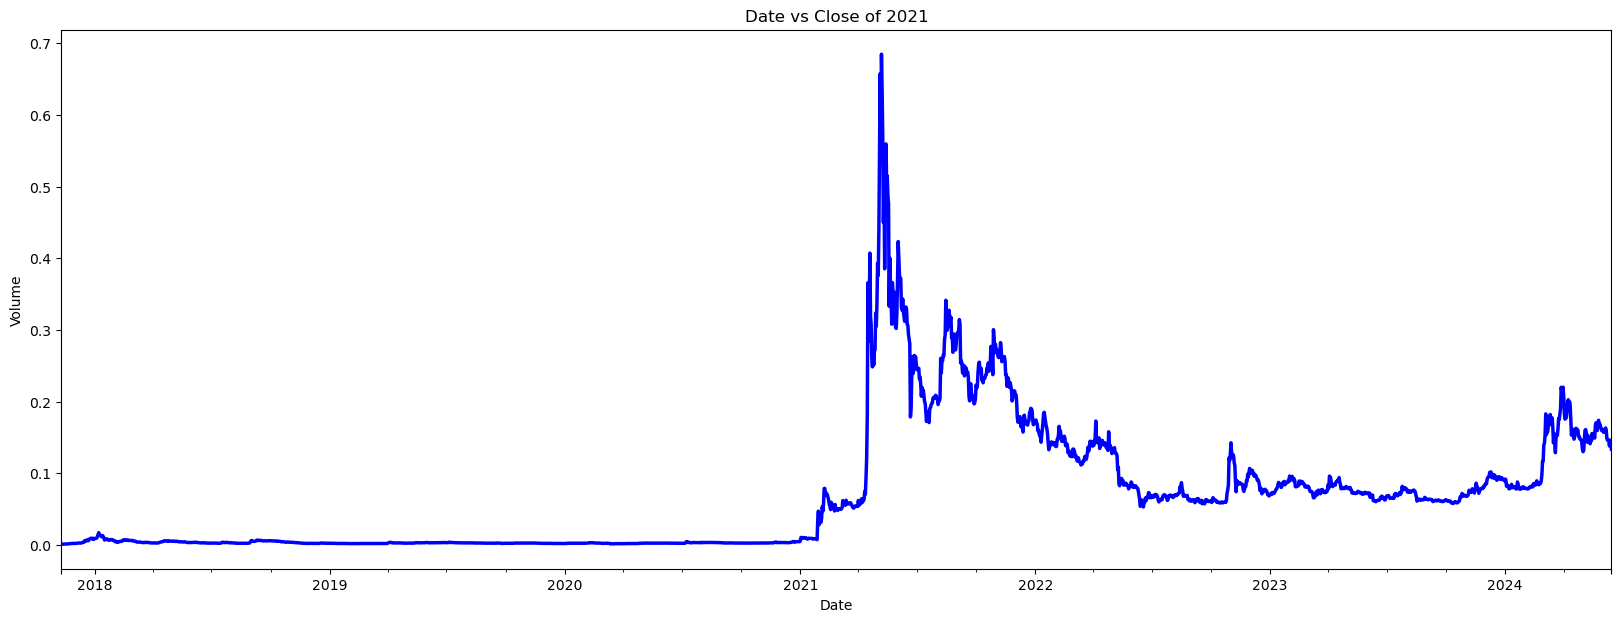

In [12]:
# Now, firstly we will analyze the closing price as we need it to perform the prediction.
plt.figure(figsize=(20, 7)) 
x = data.groupby('Date')['Close'].mean() 
x.plot(linewidth=2.5, color='b') 
plt.xlabel('Date') 
plt.ylabel('Volume') 
plt.title("Date vs Close of 2021")


In [13]:
# The column ‘Close’ is our predicted feature. We are taking different factors from the predefined factors for our own calculation and naming them suitably. Also, we are checking each factor while correlating with the ‘Close’ column while sorting it in descending order.

data["gap"] = (data["High"] - data["Low"]) * data["Volume"] 
data["y"] = data["High"] / data["Volume"] 
data["z"] = data["Low"] / data["Volume"] 
data["a"] = data["High"] / data["Low"] 
data["b"] = (data["High"] / data["Low"]) * data["Volume"] 
abs(data.corr()["Close"].sort_values(ascending=False)) 


Close        1.000000
Adj Close    1.000000
High         0.995106
Low          0.994567
Open         0.992505
Volume       0.580478
b            0.448402
gap          0.366322
a            0.162905
z            0.071485
y            0.073332
Name: Close, dtype: float64

In [14]:
# By, observing the correlating factors, we can choose a few of them. We are excluding High, Low, and Open as they are highly correlated from the beginning.
data = data[["Close", "Volume", "gap", "a", "b"]] 
data.head() 


,Close,Volume,gap,a,b
Date,,,,,
2017-11-10,0.001163,4246520,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270,478.88511,1.189401,2.951226e+06
2017-11-14,0.001184,2660340,287.31672,1.095491,2.914378e+06


In [16]:
# Introducing the ARIMA model for Time Series Analysis. ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q) where AR stands for Autoregression i.e. p, I stands for Integration i.e. d, MA stands for Moving Average i.e. q. Whereas, SARIMAX is Seasonal ARIMA with exogenous variables.
df2 = data.tail(30) 
train = df2[:11] 
test = df2[-19:] 

print(train.shape, test.shape) 


(11, 5) (19, 5)


In [17]:
# The shape of the train is (11, 5), and the test is (19, 5). Let’s implement the SARIMAX model and see the results.


Model Development

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model = SARIMAX(endog=train["Close"], exog=train.drop( 
	"Close", axis=1), order=(2, 1, 1)) 
results = model.fit() 
print(results.summary()) 


E:\Anaconda_Python3_Codes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda_Python3_Codes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda_Python3_Codes\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  39.012
Date:                Sat, 15 Jun 2024   AIC                            -62.023
Time:                        00:14:41   BIC                            -59.603
Sample:                    05-16-2024   HQIC                           -64.679
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      1.393e-09   6.16e-10      2.260      0.024    1.85e-10     2.6e-09
gap         7.919e-09   4.29e-09      1.845      0.065   -4.93e-10    1.63e-08
a              0.4799   4.05e-11   1.18e+10      0.0

In [20]:
# Now, observe the prediction in time series.

start = 11
end = 29
predictions = results.predict( 
	start=start, 
	end=end, 
	exog=test.drop("Close", axis=1)) 
predictions 


2024-05-27    0.165108
2024-05-28    0.163209
2024-05-29    0.164296
2024-05-30    0.162237
2024-05-31    0.158236
2024-06-01    0.145864
2024-06-02    0.154514
2024-06-03    0.158053
2024-06-04    0.151577
2024-06-05    0.149546
2024-06-06    0.156955
2024-06-07    0.159664
2024-06-08    0.150214
2024-06-09    0.148395
2024-06-10    0.149483
2024-06-11    0.151332
2024-06-12    0.154574
2024-06-13    0.152210
2024-06-14    0.158150
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

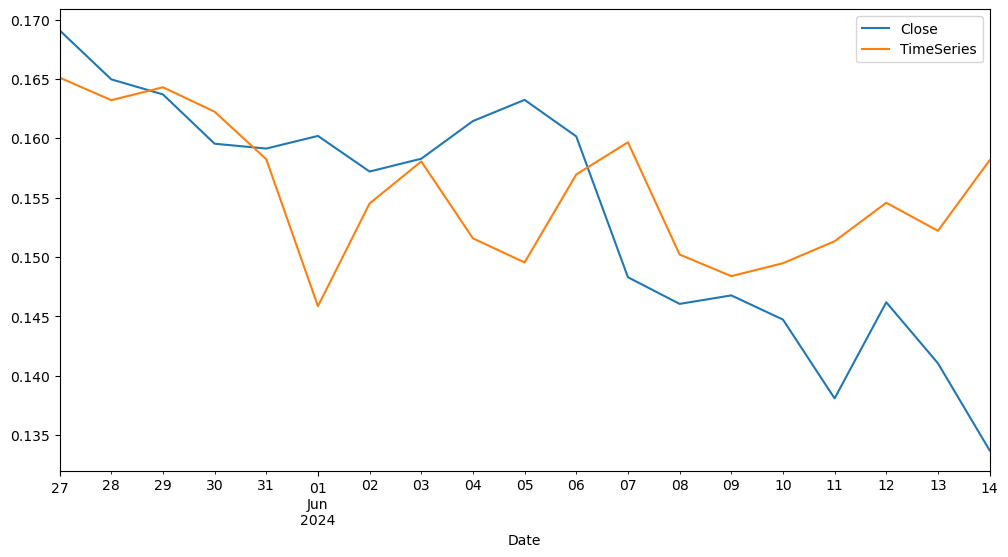

In [21]:
# Finally, plot the prediction to get a visualization.
test["Close"].plot(legend=True, figsize=(12, 6)) 
predictions.plot(label='TimeSeries', legend=True) 
